In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [51]:
df = pd.read_csv("data/teleCust1000t.csv")
df.sample(5)
# len(df)

1000

In [23]:
corr_values = df.corr()['custcat'].drop('custcat')
corr_values

region    -0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender    -0.004966
reside     0.082022
Name: custcat, dtype: float64

In [26]:
corr = df.corr()

<Axes: >

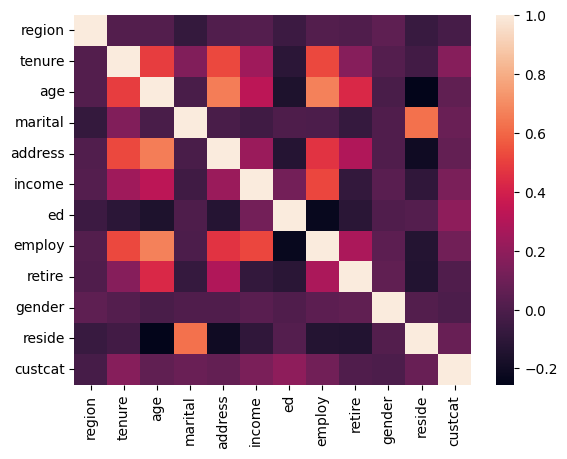

In [27]:
sns.heatmap(corr) 

In [28]:
X = df.drop('custcat',axis=1) # df
y = df['custcat'] # series

In [52]:
selected_features = X.filter(items=["ed", "income"])
selected_features

,ed,income
0,4,64.0
1,5,136.0
2,1,116.0
3,2,33.0
4,1,30.0
...,...,...
995,3,27.0
996,5,22.0
997,5,944.0
998,2,87.0


In [29]:
X_norm = StandardScaler().fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [48]:
k = 40
#Train Model and Predict  
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

In [ ]:
# k =3

In [34]:
yhat = knn_model.predict(X_test)

In [54]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.395


In [ ]:
# k = 6

In [37]:
yhat = knn_model.predict(X_test)

In [38]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.31


In [ ]:
# k = 4

In [42]:
yhat = knn_model.predict(X_test)

In [43]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.32


In [ ]:
# k = 40

In [49]:
yhat = knn_model.predict(X_test)

In [50]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.395


In [ ]:
# plotting accuracy and std for each value of k # getting more accurate or less accurate? optimal value of k?

In [46]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

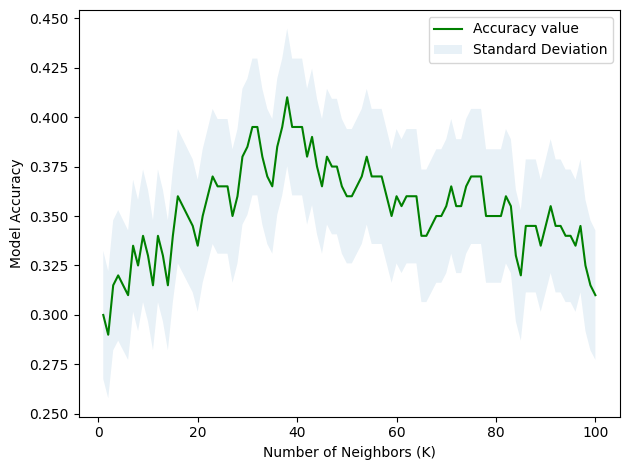

In [47]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
# Optimial k is around 40. Model starts to overfit (memorize) the dataset and peaking at 40 so it doesn't generalize
# well to unseen data with higher values of k

# Despite having an optimal k value the accuracy score is not that high (0.395). What is the cause? A large number of weakly correlated
# correlated features creates more dimensionality in the feature space making it more difficult to determine the decision boundaries
# for classification